# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.646290e+01     1.219996e+01
 * time: 0.001516103744506836
     1     3.579009e+01     1.110276e+01
 * time: 0.004126071929931641
     2     2.349851e+01     3.870783e+00
 * time: 0.010020017623901367
     3     2.317862e+01     6.652838e+00
 * time: 0.014162063598632812
     4     2.190546e+01     4.715873e+00
 * time: 0.018358945846557617
     5     2.038851e+01     2.885881e+00
 * time: 0.02325606346130371
     6     1.896330e+01     2.020170e+00
 * time: 0.027259111404418945
     7     1.858388e+01     2.858725e+00
 * time: 0.05463290214538574
     8     1.820317e+01     1.684770e+00
 * time: 0.0588381290435791
     9     1.786113e+01     1.033814e+00
 * time: 0.06241297721862793
    10     1.762414e+01     1.011679e+00
 * time: 0.06593608856201172
    11     1.758229e+01     1.441833e+00
 * time: 0.06864094734191895
    12     1.758071e+01     1.686451e+00
 * time: 0.07139897346496582
    13     1.750966e+01     1.451370e+00
 * 

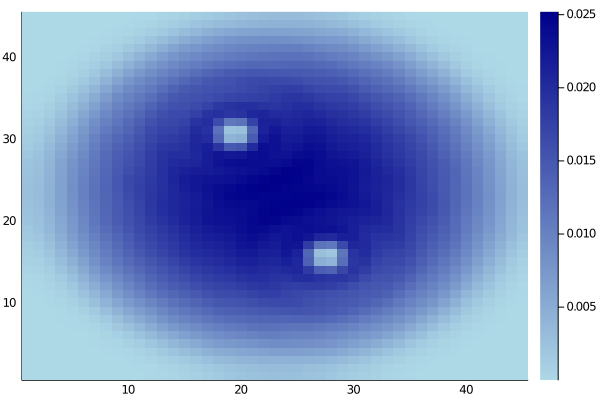

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)